<a href="https://colab.research.google.com/github/R3gm/Colab-resources/blob/main/Fine_tuned_VAE_decoder_compare_Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Best Avaliable Stable Diffusion™
Use the [v1-5 model released by Runwayml](https://huggingface.co/runwayml/stable-diffusion-v1-5) together with the [fine-tuned VAE decoder by StabilityAI](https://huggingface.co/stabilityai/sd-vae-ft-mse)

| Description | Link |
| ----------- | ---- |
| 📙 Original Colab | [![PyTTI-Tools:FILM](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/174iLnLZbO4yKTwKHw1L4ljQTnKez4K7l) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/Colab-resources/) |


Fine-tuning the VAE yields the best results in generation.

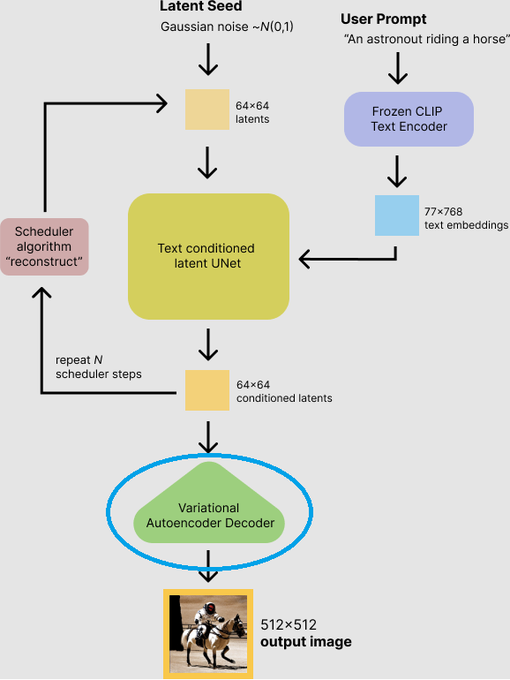

In [ ]:
#@title Install Stuff
!pip install diffusers transformers ftfy huggingface_hub
from PIL import Image
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.9/934.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.5 MB/s eta 0:00:00


## Don't forget to visit the repo page, read and accept the LICENSE if you agree

In [ ]:
#@title Set up the pipeline
from diffusers.models import AutoencoderKL
from diffusers import StableDiffusionPipeline
from torch import autocast
import torch

model = "runwayml/stable-diffusion-v1-5" #@param {type:"string"}
vae = "sd-vae-ft-mse" #@param["original", "sd-vae-ft-mse", "sd-vae-ft-ema"]
if(vae!="original"):
  vae = AutoencoderKL.from_pretrained(f"stabilityai/{vae}")
  pipe = StableDiffusionPipeline.from_pretrained(model, vae=vae, torch_dtype=torch.float16, revision="fp16")
else:
  pipe = StableDiffusionPipeline.from_pretrained(model, torch_dtype=torch.float16, revision="fp16") 
pipe.to("cuda")

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.16.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/50 [00:00<?, ?it/s]

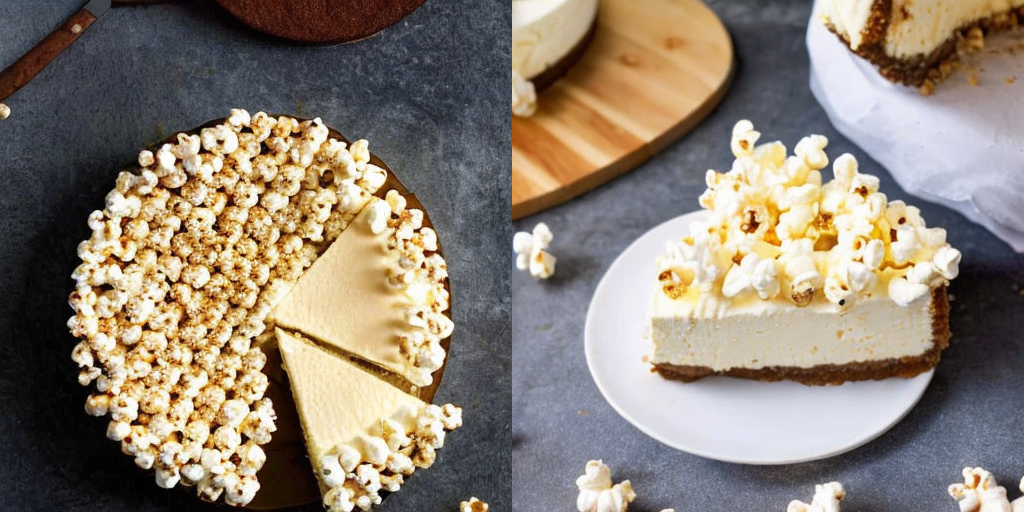

In [ ]:
#@title Run the Stable Diffusion pipeline
#@markdown Don't forget to use the placeholder token in your prompt

prompt = "a delicious popcorn cheesecake slice" #@param {type:"string"}
num_samples = 2 #@param {type:"number"}
seed = -1 #@param {type:"integer"}
steps = 50
guidance_scale = 7.5
with autocast("cuda"):
  if(seed == -1):
    images = pipe([prompt] * num_samples, num_inference_steps=steps, guidance_scale=guidance_scale).images
  else:
    generator = torch.Generator("cuda").manual_seed(seed)
    images = pipe([prompt] * num_samples, num_inference_steps=steps, guidance_scale=guidance_scale, generator=generator).images
grid = image_grid(images, 1, num_samples)
grid